**Desafio 02: Fazer um gráfico e uma tabela dos gastos dos outros estados em função do seu estado, ou qualquer outro de interesse.**

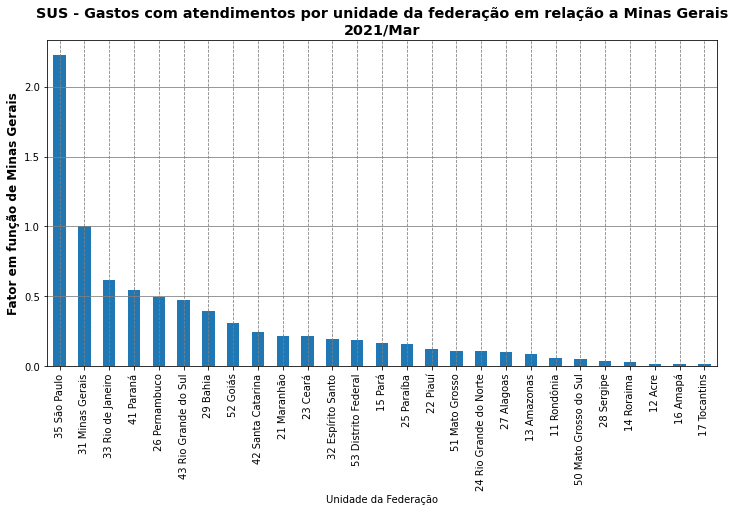

Unidade da Federação
35 São Paulo              2.223696
31 Minas Gerais           1.000000
33 Rio de Janeiro         0.616061
41 Paraná                 0.545002
26 Pernambuco             0.494765
43 Rio Grande do Sul      0.473783
29 Bahia                  0.392508
52 Goiás                  0.311691
42 Santa Catarina         0.242863
21 Maranhão               0.216775
23 Ceará                  0.215254
32 Espírito Santo         0.195615
53 Distrito Federal       0.184655
15 Pará                   0.163818
25 Paraíba                0.156904
22 Piauí                  0.119605
51 Mato Grosso            0.110752
24 Rio Grande do Norte    0.109468
27 Alagoas                0.102542
13 Amazonas               0.085222
11 Rondônia               0.059318
50 Mato Grosso do Sul     0.050588
28 Sergipe                0.038619
14 Roraima                0.029855
12 Acre                   0.014256
16 Amapá                  0.012398
17 Tocantins              0.011641
Name: 2021/Mar, dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

dados = pd.read_csv("/content/A213524189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, 
                    thousands=".", decimal=",", engine='python')

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")

ordenado_por_total = usaveis.sort_values("Total", ascending=False)#ordena
ordenado_por_total = ordenado_por_total.drop("Total",axis=1)#retira coluna Total

#retira pico máximo para ajustar a escala
ordenado_por_total = ordenado_por_total.drop(ordenado_por_total.loc['35 São Paulo'].idxmax(),axis=1)

mes_mais_recente = ordenado_por_total.columns[-1] #ultimo mes
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]

gastos_do_mais_recente_MG = gastos_do_mais_recente/gastos_do_mais_recente.loc['31 Minas Gerais']
gastos_do_mais_recente_MG = gastos_do_mais_recente_MG.sort_values(ascending=False)
ax = gastos_do_mais_recente_MG.plot(kind='bar',figsize=(12,6))

#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.2f}M"))
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}M'.format(x/1000000)))
ax.grid(b=True, axis='y', which='major', color='grey', linestyle='-')
ax.grid(b=True, axis='x', which='major', color='grey', linestyle='--')

plt.title('SUS - Gastos com atendimentos por unidade da federação em relação a Minas Gerais\n' + mes_mais_recente, weight='bold', fontsize='x-large' )
plt.ylabel("Fator em função de Minas Gerais",weight='bold',fontsize='large')
plt.show()
gastos_do_mais_recente_MG